In [3]:
pip install hmmlearn

     |████████████████████████████████| 374 kB 30.2 MB/s 


In [4]:

import datetime
import numpy as np
import pandas as pd
from pandas_datareader import data 

from hmmlearn.hmm import GaussianHMM
# the observation probability distribution is the normal distribution

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.dates import YearLocator, MonthLocator

import warnings
warnings.filterwarnings('ignore')

In [13]:
data_ori = pd.read_csv('/content/drive/MyDrive/Machine Learning For Cities/final/traffic_count.csv')

In [14]:
data_ori.columns

Index(['Unnamed: 0', 'ID', 'Segment ID', 'Roadway Name', 'From', 'To',
       'Direction', 'Date', '12:00-1:00 AM', '1:00-2:00AM', '2:00-3:00AM',
       '3:00-4:00AM', '4:00-5:00AM', '5:00-6:00AM', '6:00-7:00AM',
       '7:00-8:00AM', '8:00-9:00AM', '9:00-10:00AM', '10:00-11:00AM',
       '11:00-12:00PM', '12:00-1:00PM', '1:00-2:00PM', '2:00-3:00PM',
       '3:00-4:00PM', '4:00-5:00PM', '5:00-6:00PM', '6:00-7:00PM',
       '7:00-8:00PM', '8:00-9:00PM', '9:00-10:00PM', '10:00-11:00PM',
       '11:00-12:00AM', 'daily_volume'],
      dtype='object')

In [159]:
data_g= data_ori[['Roadway Name','Segment ID','From', 'To','daily_volume']].groupby(['Segment ID','Roadway Name','From', 'To']).count()
data_g.to_csv('/content/drive/MyDrive/Machine Learning For Cities/final/seg_.csv')

In [28]:
data_g.sort_values(by=['Segment ID'])

,Segment ID
Roadway Name,
East 170 Main Road,1
East 170 Service Road,1
WALTHAM STREET,2
101 AVE,2
BRINKERHOFF AVE,2
...,...
Southern Boulevard,184
3 Avenue,198
BROADWAY,230


In [36]:
data3= data_ori.loc[data_ori['Roadway Name']== '3 Avenue']
data3_1=data3[['Roadway Name','From','To','Segment ID']].groupby(['From','To']).count()
data3_1

,,Roadway Name,Segment ID
From,To,,
29 Street,30 Street,18,18
Astoria Line,East 61 Street,9,9
Butler Street,Douglass Street,18,18
East 123 Street,East 124 Street,9,9
East 154 Street,East 155 Street,27,27
East 155 Street,East 154 Street,9,9
East 189 Street,Park Avenue,18,18
East 46 Street,East 47 Street,9,9
East 60 Street,61 Street,9,9


In [25]:
data_g= data_ori[['Date','Segment ID']].groupby('Segment ID').count()
data_g

,Date
Segment ID,
202,1
646,8
1416,18
1421,8
1883,20
...,...
9014764,9
9017020,9
9017037,9


In [26]:
data_g.sort_values(by=['Date'])

,Date
Segment ID,
202,1
41759,2
41760,2
1886,2
1885,2
...,...
36705,64
36837,64
25210,65


In [138]:
data= data_ori.loc[data_ori['Segment ID']==77424]

In [139]:
data=data[['Date', '12:00-1:00 AM', '1:00-2:00AM', '2:00-3:00AM',
       '3:00-4:00AM', '4:00-5:00AM', '5:00-6:00AM', '6:00-7:00AM',
       '7:00-8:00AM', '8:00-9:00AM', '9:00-10:00AM', '10:00-11:00AM',
       '11:00-12:00PM', '12:00-1:00PM', '1:00-2:00PM', '2:00-3:00PM',
       '3:00-4:00PM', '4:00-5:00PM', '5:00-6:00PM', '6:00-7:00PM',
       '7:00-8:00PM', '8:00-9:00PM', '9:00-10:00PM', '10:00-11:00PM',
       '11:00-12:00AM', 'daily_volume']]

In [140]:
data['Date']

7194     09/30/2012
7195     10/01/2012
7196     10/02/2012
7197     10/03/2012
7198     10/04/2012
            ...    
33571    11/05/2019
33572    11/06/2019
33573    11/07/2019
33574    11/08/2019
33575    11/09/2019
Name: Date, Length: 70, dtype: object

In [141]:
from datetime import datetime

In [142]:
data['Date'] = data['Date'].apply(datetime.datetime.toordinal)

AttributeError: ignored

In [143]:
#data.reset_index(inplace=True,drop=False)
data.drop(['12:00-1:00 AM', '1:00-2:00AM', '2:00-3:00AM',
       '3:00-4:00AM', '4:00-5:00AM', '5:00-6:00AM', '6:00-7:00AM',
       '7:00-8:00AM', '8:00-9:00AM', '9:00-10:00AM', '10:00-11:00AM',
       '11:00-12:00PM', '12:00-1:00PM', '1:00-2:00PM', '2:00-3:00PM',
       '3:00-4:00PM', '4:00-5:00PM', '5:00-6:00PM', 
       '7:00-8:00PM', '8:00-9:00PM', '9:00-10:00PM', '10:00-11:00PM',
       '11:00-12:00AM'],axis=1,inplace=True)
#data['Date'] = data['Date'].apply(datetime.datetime.toordinal)
data= list(data.itertuples(index=False, name=None))

In [91]:
len(data)

70

In [160]:
dates = np.array([q[0] for q in data])
end_val = np.array([q[2] for q in data])
volume = np.array([q[1] for q in data])[1:]

In [149]:
volume

array([6204., 6071., 6311., 6172., 6892., 6122., 4881., 5592., 6053.,
       7230., 7529., 7599., 8295., 6589., 5241., 6791., 7219., 5710.,
       5707., 6771., 7019., 6453., 7253., 6930., 7575., 6990., 7445.,
       7537., 8138., 6129., 6332., 5502., 5997., 7265., 6697., 5504.,
       4987., 5813., 5517., 7557., 7036., 6942., 7005., 7525., 7177.,
       9364., 7648., 7231., 6631., 5440., 5597., 5179., 5787., 5294.,
       6135., 5721., 6056., 6311., 6435., 5813., 5493., 6554., 5753.,
       6742., 6402., 6472., 6772., 7030., 6531.])

In [161]:
diff

array([ -93.,  119.,  -31.,  -88.,  -21.,  131.,   34.,   10.,    9.,
         63., -101.,  -90.,   39.,  115., -111.,   -7.,   30.,    9.,
         14.,   13.,   70.,   13.,  -87.,   69.,  -39.,   19.,  -61.,
          4.,  -86.,   36.,  100.,  -59., -102.,   10.,   87.,  -37.,
         88.,    1.,   -6.,  -31.,   24.,   29.,   80.,  -92.,  -11.,
        -15., -144.,   51.,  -24.,   82.,  -64.,   27.,  -29.,   -2.,
         88.,  -93.,   64.,  -19.,  -11.,    9.,   29.,  -12.,   28.,
         34.,  -15.,  -66.])

In [163]:
X = np.column_stack([diff, end_val])

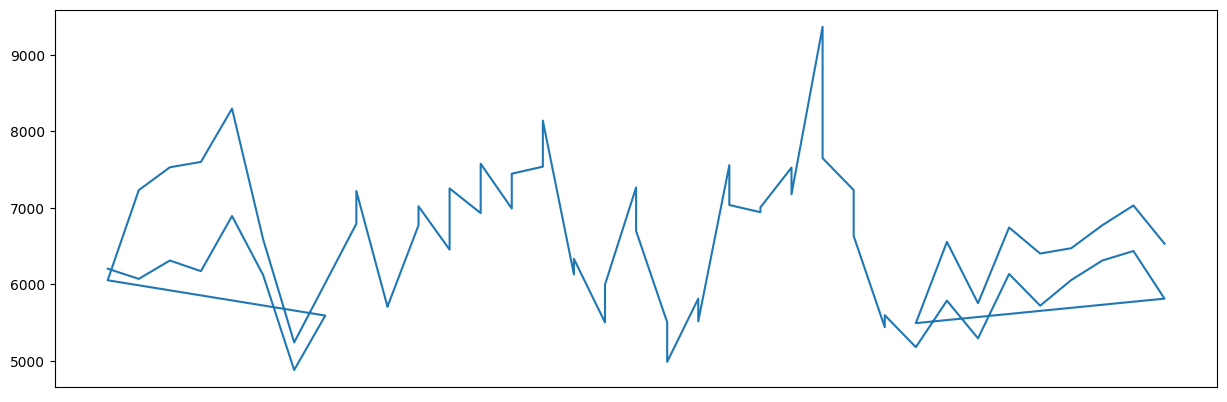

In [162]:
diff = np.diff(end_val)
dates = dates[1:]
end_val = end_val[1:]

#X = np.column_stack([diff, volume])
plt.figure(figsize=(15, 5), dpi=100) 
#plt.title(ticker + " - " + end_date.strftime("%m/%d/%Y"), fontsize = 14)
plt.gca().xaxis.set_major_locator(YearLocator())
plt.plot_date(dates,end_val,"-")
plt.show()

In [164]:
model = GaussianHMM(n_components=4, covariance_type="diag", n_iter=1000)
model.fit(X)

GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
            covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
            min_covar=0.001, n_components=4, n_iter=1000, params='stmc',
            random_state=None, startprob_prior=1.0, tol=0.01,
            transmat_prior=1.0, verbose=False)

In [165]:
hidden_states = model.predict(X)

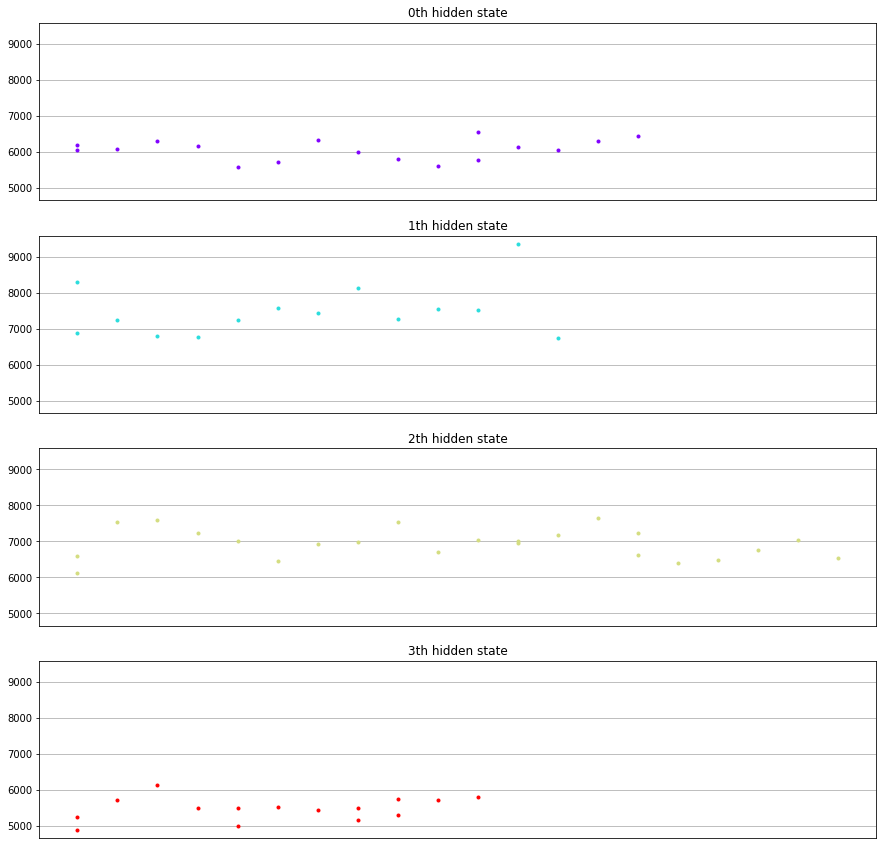

In [166]:
# From HMMLearn Documentation.....

fig, axs = plt.subplots(model.n_components, sharex=True, sharey=True, figsize=(15,15))
colours = cm.rainbow(np.linspace(0, 1, model.n_components))

for i, (ax, colour) in enumerate(zip(axs, colours)):
    # Use fancy indexing to plot data in each state.
    mask = hidden_states == i
    ax.plot_date(dates[mask], end_val[mask], ".", c=colour)
    ax.set_title("{0}th hidden state".format(i))

    # Format the ticks.
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_minor_locator(MonthLocator())

    ax.grid(True)
plt.show()

In [167]:
expected_returns_and_volumes = np.dot(model.transmat_, model.means_)
returns_and_volume_columnwise = list(zip(*expected_returns_and_volumes))
expected_returns = returns_and_volume_columnwise[0]
expected_volumes = returns_and_volume_columnwise[1]
params = pd.concat([pd.Series(expected_returns), pd.Series(expected_volumes)], axis=1)
params.columns= ['Returns', 'Volume']
print (params)

      Returns       Volume
0    8.416111  6140.113237
1 -327.178545  6845.989909
2  -21.619278  6785.505396
3  365.990469  6271.636974


In [168]:
lastN = 7
start_date = datetime.date.today() - datetime.timedelta(days=lastN*2) 

dates = np.array([q[0] for q in Stocks], dtype=int)

AttributeError: ignored

In [170]:
predicted_prices = []
predicted_dates = []
predicted_volumes = []
actual_volumes = []

for idx in range(lastN):
    state = hidden_states[-lastN+idx]
    current_price = Stocks[-lastN+idx][1]
    volume = Stocks[-lastN+idx][2]
    actual_volumes.append(volume)
    current_date = datetime.date.fromordinal(dates[-lastN+idx])
    predicted_date = current_date + datetime.timedelta(days=1)
    predicted_dates.append(predicted_date)
    predicted_prices.append(current_price + expected_returns[state])
    predicted_volumes.append(np.round(expected_volumes[state]))    

#Returns
plt.figure(figsize=(15, 5), dpi=100) 
plt.title(ticker, fontsize = 14)
plt.plot(predicted_dates,end_val[-lastN:])
plt.plot(predicted_dates,predicted_prices)
plt.legend(['Actual','Predicted'])
plt.show()

#Volumes
plt.figure(figsize=(15, 5), dpi=100) 
plt.title(ticker, fontsize = 14)
plt.plot(predicted_dates,actual_volumes)
plt.plot(predicted_dates,predicted_volumes)
plt.legend(['Actual','Predicted'])
plt.show()

NameError: ignored

In [169]:
print('Actual:',end_val[-lastN:], '\n','Prediction:', predicted_prices )

NameError: ignored